In [1]:
from sklearn.datasets import make_moons
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

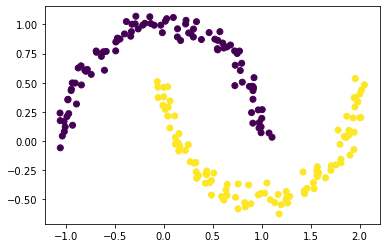

In [2]:
values, tags = make_moons(n_samples=200, noise=0.05)
x = values.T[0]
y = values.T[1]
plt.scatter(x, y, c=tags)

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2, )))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(6, activation="relu"))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(2, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.output_shape
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 3         
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [70]:
loss_fn = keras.losses.BinaryCrossentropy()
model.compile(loss=loss_fn, optimizer="adam", metrics="accuracy")
history=model.fit(values, tags, epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 2/200
7/7 [==============================] - 0s 824us/step - loss: 0.6983 - accuracy: 0.4650
Epoch 3/200
7/7 [==============================] - 0s 848us/step - loss: 0.6963 - accuracy: 0.5100
Epoch 4/200
7/7 [==============================] - 0s 686us/step - loss: 0.6949 - accuracy: 0.5500
Epoch 5/200
7/7 [==============================] - 0s 855us/step - loss: 0.6936 - accuracy: 0.5650
Epoch 6/200
7/7 [==============================] - 0s 873us/step - loss: 0.6923 - accuracy: 0.5600

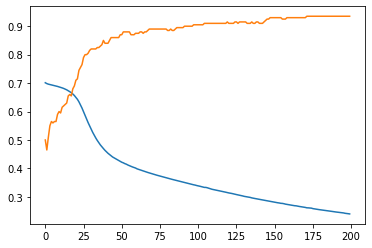

In [71]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
plt.plot(epochs, loss)
plt.plot(epochs, accuracy)

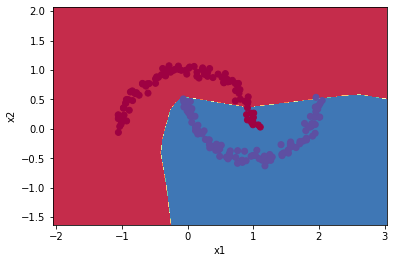

In [72]:
def draw_boundary(X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z = Z > 0.5

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()


draw_boundary(values.T, tags)
